# SENCE 2023 Examples - 3. Semester

## Common libraries and parameters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Don't show too many rows in Pandas Dataframes
pd.options.display.max_rows = 7

In [3]:
# Larger plots
plt.rcParams['figure.figsize'] = [16, 8]

## Bubble map

https://www.python-graph-gallery.com/bubble-map/

In [4]:
# "pip install folium" might be needed first : https://pypi.org/project/folium/
import folium

In [5]:
# Make a data frame with dots to show on the map.
# All the values are the same, in order to check if the projection distorts the circles
data = pd.DataFrame({
   'lon':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lat':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'Melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value': [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]
})

data

lon    lat          name  value
0   -58.00 -34.00  Buenos Aires   50.0
1     2.00  49.00         Paris   50.0
2   145.00 -38.00     Melbourne   50.0
..     ...    ...           ...    ...
5   -73.57  45.52      Montreal   50.0
6    36.82  -1.29       Nairobi   50.0
7   -38.50 -12.97      Salvador   50.0

[8 rows x 4 columns]

### Circles are distorted by Mercator projection

see https://en.wikipedia.org/wiki/Tissot%27s_indicatrix for more information

In [6]:
# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# add marker one by one on the map
for city in data.itertuples():
    folium.Circle(
        location=[city.lat, city.lon],
        popup=city.name,
        radius=city.value * 20000.0,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

m.get_root().html.add_child(folium.Element("<h3 align='center'>Map with distorted circles</h3>"))

# Show the map
m

### Avoiding deformation

In [7]:
import math
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# add marker one by one on the map, and account for Mercator deformation
for city in data.itertuples():
    local_deformation = math.cos(city.lat * math.pi / 180)
    folium.Circle(
        location=[city.lat, city.lon],
        popup='%s (%.1f)' % (city.name, city.value),
        radius=city.value * 20000.0 * local_deformation,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

m.get_root().html.add_child(folium.Element("<h3 align='center'>Map with circles of correct size</h3>"))

m.save('output/bubble_map.html')

m

## Heatmap

https://www.python-graph-gallery.com/heatmap/

### Basic example

In [8]:
# initialize columns
data = {
    'A': [0, 1, 2, 3, 4, 5, 6],
    'B': [1, 2, 3, 4, 5, 6, 7],
    'C': [2, 3, 4, 5, 6, 7, 8],
    'D': [3, 4, 5, 6, 7, 8, 9],
    'E': [4, 5, 6, 7, 8, 9, 10],
    'F': [5, 6, 7, 8, 9, 10, 11]
}
df = pd.DataFrame(data)

In [9]:
df

A  B  C  D   E   F
0  0  1  2  3   4   5
1  1  2  3  4   5   6
2  2  3  4  5   6   7
3  3  4  5  6   7   8
4  4  5  6  7   8   9
5  5  6  7  8   9  10
6  6  7  8  9  10  11

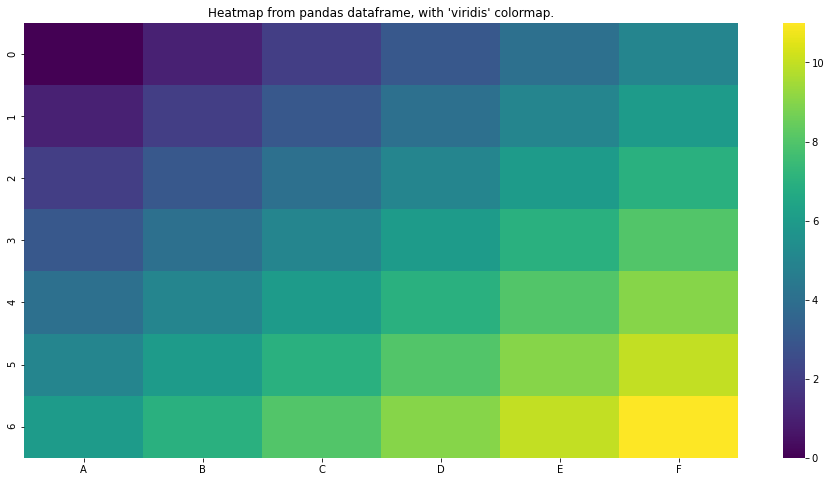

In [10]:
colors = 'viridis' # See https://matplotlib.org/stable/gallery/color/colormap_reference.html
sns.heatmap(df, cmap=colors)
plt.title("Heatmap from pandas dataframe, with '%s' colormap." % colors)
plt.show()

### Heatmap from timeseries

In [11]:
# Parse a whole year of weather data
weather_df = pd.read_csv('output/SchPark01.csv',
            sep = ';',
            na_values = ' ',
            names = ['date', 'time', 'ghi', 'ta'],
            parse_dates = [[0, 1]],
            index_col = 'date_time'
           )
weather_df

ghi   ta
date_time                    
2011-01-01 00:00:00  0.0 -0.6
2011-01-01 00:15:00  0.0 -0.4
2011-01-01 00:30:00  0.0 -0.5
...                  ...  ...
2011-12-31 23:15:00  0.0  8.4
2011-12-31 23:30:00  0.0  8.5
2011-12-31 23:45:00  0.0  8.1

[35040 rows x 2 columns]

In [12]:
# Temperatures(day_of_year, time)
temperatures = pd.pivot_table(weather_df, values='ta', index=weather_df.index.time, columns=weather_df.index.dayofyear)
temperatures

date_time  1    2    3    4    5    6     7     8     9    10   ...  356  357  \
00:00:00  -0.6  1.0  0.7 -3.3 -6.7 -2.0   8.4   9.6  10.9  3.9  ...  2.9  6.9   
00:15:00  -0.4  1.0  0.5 -3.7 -7.9 -2.5   8.4   9.4  10.7  3.8  ...  2.8  7.0   
00:30:00  -0.5  1.0  0.5 -3.0 -7.4 -2.1   8.4   9.2  10.8  3.6  ...  2.8  7.0   
...        ...  ...  ...  ...  ...  ...   ...   ...   ...  ...  ...  ...  ...   
23:15:00   1.0  0.6 -3.5 -6.9 -2.2  8.4   9.0  10.5   4.2  3.7  ...  6.7  7.3   
23:30:00   1.0  0.5 -3.5 -7.3 -2.2  8.4  10.2  10.7   4.2  3.5  ...  6.7  7.3   
23:45:00   1.0  0.7 -3.3 -6.9 -2.5  8.6  10.4  10.9   4.1  3.5  ...  6.9  7.2   

date_time  358  359  360  361  362  363  364  365  
00:00:00   7.2  4.9  6.0  7.9  5.3  3.5  4.7  4.6  
00:15:00   7.1  4.9  6.0  8.2  5.2  3.6  4.3  4.6  
00:30:00   7.1  4.8  6.0  8.2  4.9  4.4  5.2  4.0  
...        ...  ...  ...  ...  ...  ...  ...  ...  
23:15:00   5.0  6.0  8.3  5.5  5.0  4.4  4.1  8.4  
23:30:00   5.2  6.1  8.5  5.4  4.4  4.5  4.2  8.5  
23:45:00   4.9  6.1  8.1  5.3  3.9  5.1  4.6  8.1  

[96 rows x 357 columns]

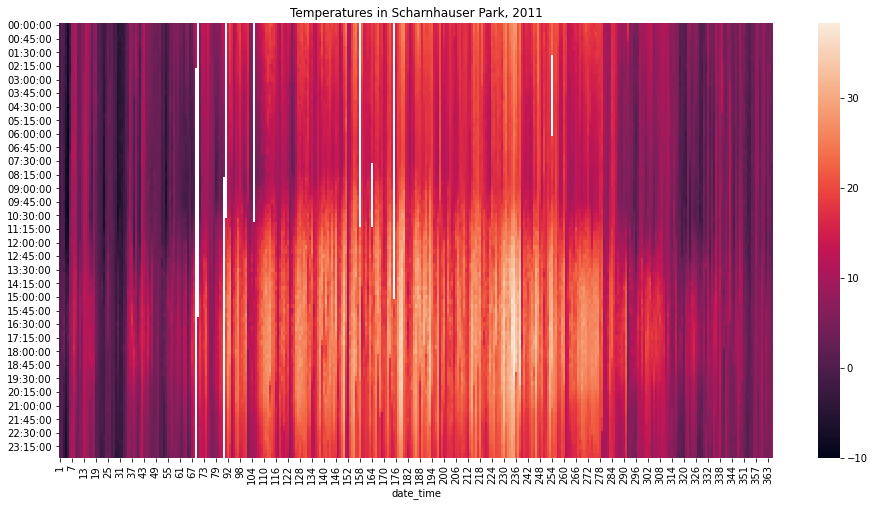

In [13]:
sns.heatmap(temperatures, annot=False)
plt.title('Temperatures in Scharnhauser Park, 2011')
plt.show()

## Correlogram

https://www.python-graph-gallery.com/correlogram/

In [14]:
# What are the available datasets?
', '.join(sns.get_dataset_names())

'anagrams, anscombe, attention, brain_networks, car_crashes, diamonds, dots, dowjones, exercise, flights, fmri, geyser, glue, healthexp, iris, mpg, penguins, planets, seaice, taxis, tips, titanic'

In [15]:
penguins_df = sns.load_dataset('penguins')
penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
..      ...        ...             ...            ...                ...   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
..           ...     ...  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

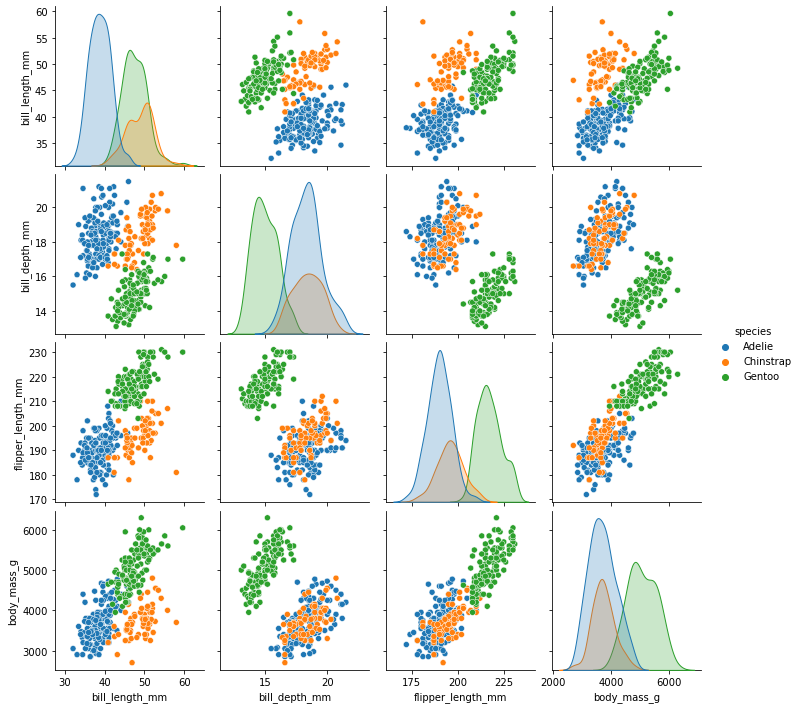

In [16]:
# Basic correlogram
sns.pairplot(penguins_df, hue='species')
plt.show()

## FlapPyBird

Slightly modified version of FlapPyBird, with high score file and plot if desired:

https://github.com/EricDuminil/FlapPyBird

In [17]:
high_score_filename = 'output/my_high_score.csv'

In [18]:
# Find the best score, without any library

previous_record = 0

with open(high_score_filename) as high_score_file:
    for line in high_score_file:
        when, old_score = line.split(';')
        old_score = int(old_score)
        if old_score > previous_record:
            previous_record = old_score

print("Current best score is : %d" % previous_record )

Current best score is : 18


In [19]:
# Parse high score file with Pandas
high_score_df = pd.read_csv(high_score_filename,
                 sep=';',
                 names=['datetime', 'score'],
                 parse_dates=True,
                 index_col='datetime')
high_score_df

score
datetime                  
2023-01-26 21:11:23      1
2023-01-26 21:11:32      3
2023-01-26 21:11:41      4
...                    ...
2023-01-27 15:56:00      1
2023-01-27 15:56:13      8
2023-01-27 15:56:29      9

[35 rows x 1 columns]

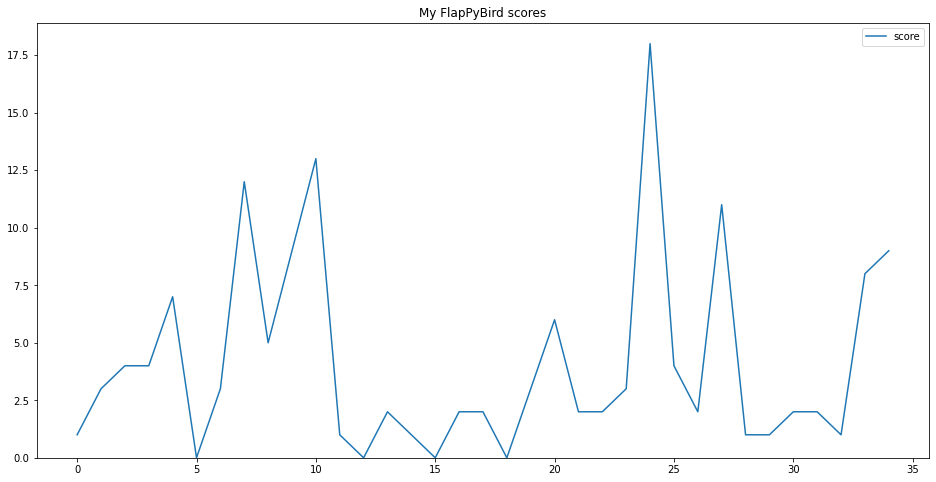

In [20]:
high_score_df.plot(ylim=(0, None),
        title='My FlapPyBird scores',
        use_index=False,
        xlabel='Attempt #')

plt.show()